In [28]:
# Ignoring Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas_datareader as web
import pandas as pd
from yahoo_fin import stock_info as si
import datetime as dt
# yfinance is where we will pull our data from
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
import numpy as np
import seaborn as sns

# Normalizing the Adjusted Close column and Saving into the Database

In [2]:
# Reading the stocks_adj_close.csv
stocks = pd.read_csv("stocks_adj_close.csv", index_col = [0], parse_dates = [0])
stocks.head()

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,19.963375,5.005957,37.928116,6.556004,21.944105,8.53,19.619041,33.540310,37.700001,23.353294,...,54.343529,29.609983,45.093864,13.622756,43.354244,32.392876,18.730406,54.986431,28.620001,11.777194
2010-01-06,19.892447,4.798555,38.258835,6.451721,21.736616,8.40,19.727999,33.896866,37.619999,23.308975,...,55.218384,29.282593,44.502361,13.648920,43.728966,32.606281,18.596510,54.968670,28.400000,12.801298
2010-01-07,19.866661,4.939965,38.249397,6.439795,21.388035,8.40,19.891426,33.865170,36.889999,23.124332,...,55.055614,29.151625,45.452759,13.590055,43.591572,33.033108,18.591158,56.229664,27.690001,14.235043
2010-01-08,19.860210,4.845691,38.400570,6.482610,21.620428,8.23,19.993120,33.730465,36.689999,23.257280,...,54.994595,28.883154,45.127102,13.596595,43.416714,33.033108,18.596510,55.048595,27.600000,14.004617
2010-01-11,19.873106,4.751417,38.022617,6.425421,21.861107,8.08,20.094807,33.698780,36.209999,23.124332,...,55.543926,29.073048,44.980888,13.727399,43.903843,33.459942,18.917879,56.265182,27.690001,14.089961


In [3]:
# Getting the tickers list
tickers = list(stocks.columns)

In [4]:
# As you can see all the stocks are not starting from same y value, 
# lets normalize the data and then plot and see the price fluctuations
# we will divide every row by the first row and multiply by 100 to covert it into %
# for example the following code is printing the normalized values of first column
# Lets normalize all the columns
# norm_adj_close = (stocks/(stocks.iloc[0]))*100
# norm_adj_close.head()

In [5]:
# Lets plot the normalized closed values
# norm_adj_close.plot(figsize = (15,8), fontsize = 12)
# plt.legend(loc = "upper left", fontsize = 12)
# plt.show()

In [6]:
# Merging into Database
# for ticker in tickers:
#     df = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
#     df['Normalized Adj Close'] = norm_adj_close[ticker]
#     df.to_csv(f'stock_data/{ticker}.csv')

In [7]:
start = '2010-01-01'
end = '2022-04-08'
# Load sp500_df return data for comparing the returns of individual stocks
sp500_df = web.DataReader('^GSPC', 'yahoo', start, end)
sp500_df['Percent Change'] = sp500_df['Adj Close'].pct_change()
sp500_return = (sp500_df['Percent Change'] + 1).cumprod()[-1]

In [8]:
sp500_df.head()

,High,Low,Open,Close,Volume,Adj Close,Percent Change
Date,,,,,,,
2010-01-04,1133.869995,1116.560059,1116.560059,1132.989990,3991400000,1132.989990,NaN
2010-01-05,1136.630005,1129.660034,1132.660034,1136.520020,2491020000,1136.520020,0.003116
2010-01-06,1139.189941,1133.949951,1135.709961,1137.140015,4972660000,1137.140015,0.000546
2010-01-07,1142.459961,1131.319946,1136.270020,1141.689941,5270680000,1141.689941,0.004001
2010-01-08,1145.390015,1136.219971,1140.520020,1144.979980,4389590000,1144.979980,0.002882


In [9]:
sp500_return

3.9614469888015336

In [10]:
# Lets figure out the best performers by comparing with the spy returns
# We will assign
return_list = []
for ticker in tickers:
    df = stocks[ticker]
    df['Percent Change'] = df.pct_change()
    stock_return = ((df['Percent Change'] + 1).cumprod())[-1]
    returns_compared = round((stock_return / sp500_return),2)
    return_list.append(returns_compared)

In [11]:
best_performers = pd.DataFrame(list(zip(tickers, return_list)), columns = ['Ticker', 'Returns Compared'])

In [12]:
best_performers

,Ticker,Returns Compared
0,A,1.71
1,AAL,0.84
2,AAP,1.50
3,AAPL,6.55
4,ABC,1.90
...,...,...
438,XRAY,0.37
439,YUM,1.61
440,ZBH,0.60
441,ZBRA,3.67


In [13]:
# Showing the ranking in percentile form
best_performers['Score'] = best_performers['Returns Compared'].rank(pct = True)*100

In [14]:
best_performers.head()

,Ticker,Returns Compared,Score
0,A,1.71,61.851016
1,AAL,0.84,23.363431
2,AAP,1.50,53.047404
3,AAPL,6.55,97.291196
4,ABC,1.90,67.945824


In [15]:
# Setting the condition of picking the stocks which are in top 70% quantile 
# We can do the same thing with sharpe ratio and other factors
best_performers = best_performers[best_performers['Score'] >= (best_performers['Score'].quantile(0.70))]

In [16]:
best_performers.sort_values(by = 'Score', ascending = False)

,Ticker,Returns Compared,Score
138,DXCM,14.70,100.000000
297,NVDA,13.54,99.774266
130,DPZ,13.53,99.548533
287,NFLX,12.21,99.322799
43,AVGO,10.18,99.097065
...,...,...,...
284,NDSN,2.04,70.993228
207,INCY,2.04,70.993228
86,CINF,2.03,70.654628
12,ADSK,2.02,70.316027


In [17]:
len(best_performers)

133

In [18]:
final_df = pd.DataFrame(columns = ['Tickers', 'Latest_Price', 'Score', 'PE_Ratio','PEG_Ratio','SMA_150', 'SMA_200', '52_week_low', '52_week_high'])

In [23]:
for ticker in best_performers['Ticker']:
    try:
        df = pd.read_csv(f'stock_data/{ticker}.csv', index_col = 0)
        moving_avg = [150, 200]
        for ma in moving_avg:
            df['SMA_'+str(ma)] = round(df['Adj Close'].rolling(window = int(ma)).mean(), 2)
        latest_price = df['Adj Close'][-1]
        pe_ratio = float(si.get_quote_table(ticker)['PE Ratio (TTM)'])
#         peg_ratio = float(si.get_stats_valuation(ticker)[1][4])
#         if peg_ratio != peg_ratio: # Check for NaN
#             peg_ratio = 0
        moving_average_150 = df['SMA_150'][-1]
        moving_average_200 = df['SMA_200'][-1]
        low_52week = round(min(df['Low'][-(52*5):]), 2) # 5 days of trading times 52 week in a year
        high_52week = round(max(df['High'][-(52*5):]), 2)
        score = round(best_performers[best_performers['Ticker'] == ticker]['Score'].tolist()[0])
            
        # Conditions
        condition_1 = latest_price > moving_average_150 > moving_average_200
        condition_2 = latest_price >= (1.3 * low_52week)
        condition_3 = latest_price >= (0.75 * high_52week)
        condition_4 = pe_ratio < 40
#         condition_5 = peg_ratio < 2
            
        # Conditional
        if condition_1 and condition_2 and condition_3:            #condition_1 and condition_2 and condition_3 and 
            final_df = final_df.append({'Tickers': ticker,
                                        'Latest_Price': latest_price,
                                        'Score': score,
                                        'PE_Ratio': pe_ratio,
#                                         'PEG_Ratio': peg_ratio,
                                        'SMA_150': moving_average_150,
                                        'SMA_200': moving_average_200,
                                        '52_week_low': low_52week,
                                        '52_week_high': high_52week}, 
                                         ignore_index = True)
    
    except Exception as e:
        print(f"{e} for {ticker}")
              

In [24]:
final_df.sort_values(by = 'Score', ascending = False)
pd.set_option('display.max_columns', 10)
print(final_df)
final_df.to_csv('portfolio/portfolio2-PE-PEG.csv')

    Tickers Latest_Price Score PE_Ratio PEG_Ratio SMA_150 SMA_200 52_week_low  \
0      AAPL   170.089996    97    29.42         0  161.37  157.45      121.15   
1       ACN   338.920013    80    32.62         0  348.17  340.38      276.07   
2       AJG   183.190002    87    38.98         0  159.93  154.88      124.21   
3      AMAT   119.959999    83    17.95         0  140.13  138.99      114.39   
4       AME   131.820007    72     31.9         0  134.68   134.9       121.8   
..      ...          ...   ...      ...       ...     ...     ...         ...   
104     TSN    92.440002    75     11.4       NaN   85.08   82.27       69.88   
105    ULTA   401.549988    96    26.65       NaN  382.35  375.39      299.77   
106     UNH   545.960022    95    33.15       NaN  462.12  449.55      360.55   
107     VLO   103.220001    77      NaN       NaN   78.79   75.46       58.85   
108     WRB    67.699997    74    12.48       NaN   55.48    53.8       47.13   

    52_week_high  
0       

# Visualization

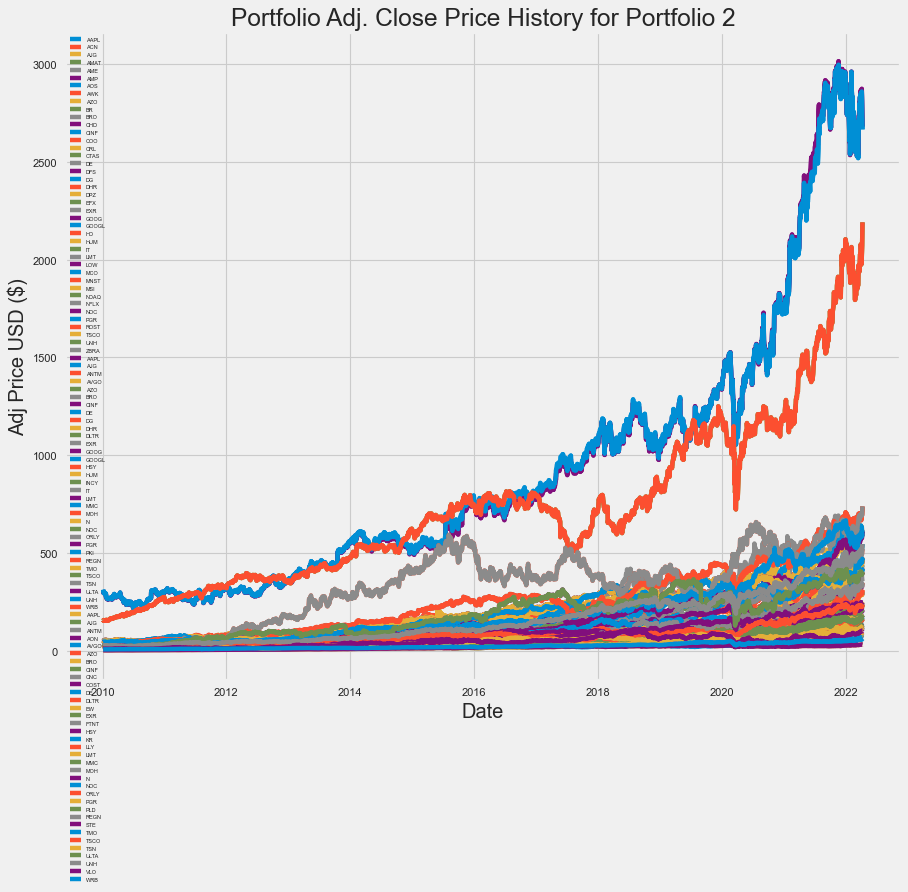

In [29]:
# Visually show the stock Portfolio
title = 'Portfolio Adj. Close Price History for Portfolio 2'

# Get the tickers for our Portfolio
my_stocks = final_df['Tickers']

# Create and plot the graph
plt.figure(figsize=(12, 10), dpi=80)
for ticker in my_stocks:
    df1 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    plt.plot(df1['Adj Close'], label = ticker)

plt.title(title, fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Price USD ($)', fontsize = 18)
plt.legend(my_stocks, prop={'size': 5}, loc = 'upper left')
plt.savefig('figures/portfolio_2.png')
plt.savefig('figures/portfolio_2.pdf')
plt.show()

# Calculating Returns

In [30]:
# show the daily simple returns
portfolio = pd.DataFrame()
portfolio_returns = pd.DataFrame()
for ticker in my_stocks:
    df2 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    portfolio[ticker] = df2['Adj Close']
    portfolio_returns[ticker] = df2['Adj Close'].pct_change().dropna()
portfolio_returns

,AAPL,ACN,AJG,AMAT,AME,...,KR,LLY,PLD,STE,VLO
Date,,,,,,,,,,,
2010-01-06,-0.015906,0.010631,0.000450,-0.002115,0.001041,...,0.000494,0.007388,-0.008935,-0.001062,0.025068
2010-01-07,-0.001849,-0.000935,-0.006301,-0.010593,0.002599,...,0.009877,-0.005078,0.008232,-0.014523,0.007443
2010-01-08,0.006648,-0.003978,0.002717,0.038544,0.019445,...,-0.009291,-0.007655,-0.002721,-0.005032,-0.013720
2010-01-11,-0.008822,-0.000939,0.001355,0.021993,0.005849,...,0.003948,0.013714,0.001169,-0.000722,-0.009631
2010-01-12,-0.011375,-0.006349,0.005864,-0.045057,-0.020481,...,0.018191,-0.003382,-0.022196,-0.011207,-0.016208
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,0.023693,0.011244,-0.014059,0.015933,-0.002828,...,-0.000696,-0.004271,-0.012183,-0.007056,-0.005234
2022-04-05,-0.018942,-0.004790,0.005462,-0.059719,-0.016493,...,0.003656,0.003672,0.015264,-0.002234,0.007147
2022-04-06,-0.018451,-0.007467,0.023904,-0.019555,0.001062,...,0.018734,0.045643,0.023033,0.012821,0.018135


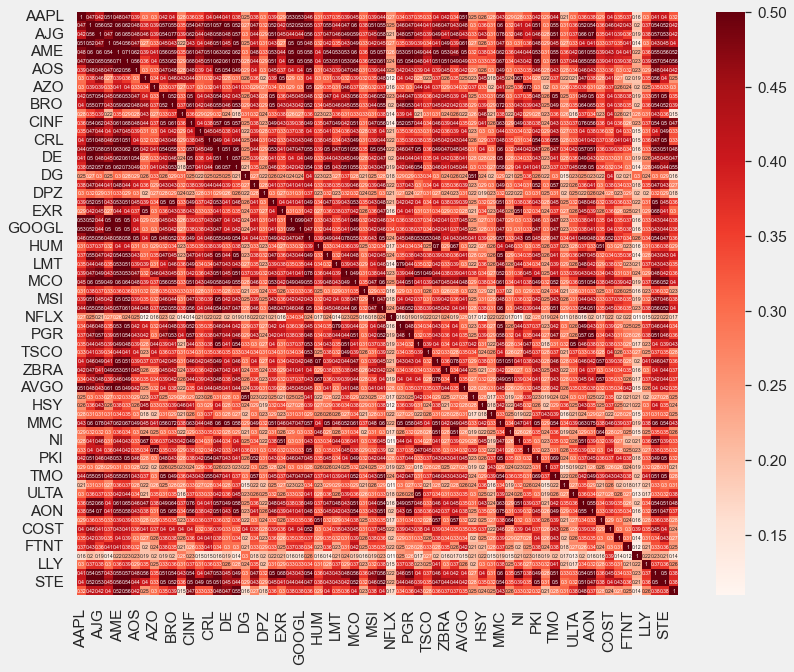

In [31]:
# Making a heat map representing the correlation matrix
plt.figure(figsize = (12, 10))
sns.set(font_scale = 1.4)
sns.heatmap(portfolio_returns.corr(), cmap = "Reds", annot = True, annot_kws = {"size": 5}, vmax = 0.5)
plt.savefig('figures/portfolio_2_hm.png')
plt.savefig('figures/portfolio_2_hm.pdf')
plt.show()

In [32]:
# Create and show the annualized covariance matrix
cov_matrix_annual = portfolio_returns.cov() * 252
cov_matrix_annual

,AAPL,ACN,AJG,AMAT,AME,...,KR,LLY,PLD,STE,VLO
AAPL,0.078917,0.031319,0.023603,0.050635,0.033374,...,0.012211,0.019756,0.030912,0.027448,0.035641
ACN,0.031319,0.056125,0.026901,0.043257,0.035632,...,0.012519,0.021140,0.034303,0.030094,0.039106
AJG,0.023603,0.026901,0.040921,0.033497,0.030123,...,0.010052,0.018090,0.030806,0.026191,0.033146
AMAT,0.050635,0.043257,0.033497,0.124887,0.047925,...,0.013500,0.025198,0.040998,0.038655,0.055575
AME,0.033374,0.035632,0.030123,0.047925,0.062376,...,0.014541,0.021482,0.036733,0.034169,0.051369
...,...,...,...,...,...,...,...,...,...,...,...
KR,0.012211,0.012519,0.010052,0.013500,0.014541,...,0.069595,0.014137,0.016109,0.013689,0.014840
LLY,0.019756,0.021140,0.018090,0.025198,0.021482,...,0.014137,0.056797,0.023469,0.020878,0.024488
PLD,0.030912,0.034303,0.030806,0.040998,0.036733,...,0.016109,0.023469,0.072148,0.032641,0.040306
STE,0.027448,0.030094,0.026191,0.038655,0.034169,...,0.013689,0.020878,0.032641,0.059073,0.036290


In [33]:
# Calculate the portfolio variance
# weights = np.full((1, 30), 0.033)
weights = np.empty(66); weights.fill(1/66)
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.028669657770138333

In [34]:
# Calculate portfolio Volatility aka Standard Deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.1693211675194166

In [35]:
# Calculate annual portfolio returns
port_simple_annual_return = np.sum(portfolio_returns.mean() * weights) * 252
port_simple_annual_return

0.24945963140362493

In [36]:
# Show the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_volatility = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(port_simple_annual_return, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual Volatility / Risk: '+ percent_volatility)
print('Annual Variance: '+ percent_var)

Expected annual return: 25.0%
Annual Volatility / Risk: 17.0%
Annual Variance: 3.0%


# Portfolio Optimization

In [37]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [38]:
# Portfolio Optimization

# Calculate the expected returns and the annualized samplecovariance matrix of asset returns
mu = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('AAPL', 0.06257), ('ACN', 0.0), ('AJG', 0.0), ('AMAT', 0.0), ('AME', 0.0), ('AMP', 0.0), ('AOS', 0.0), ('AWK', 0.0), ('AZO', 0.06545), ('BR', 0.0), ('BRO', 0.0), ('CHD', 0.01078), ('CINF', 0.0), ('COO', 0.0), ('CRL', 0.0), ('CTAS', 0.01011), ('DE', 0.0), ('DFS', 0.0), ('DG', 0.02594), ('DHR', 0.0), ('DPZ', 0.21073), ('EFX', 0.0), ('EXR', 0.1895), ('GOOG', 0.0), ('GOOGL', 0.0), ('HD', 0.0), ('HUM', 0.0), ('IT', 0.0), ('LMT', 0.0), ('LOW', 0.0), ('MCO', 0.0), ('MNST', 0.0), ('MSI', 0.0), ('NDAQ', 0.0), ('NFLX', 0.03615), ('NOC', 0.0), ('PGR', 0.0), ('ROST', 0.0), ('TSCO', 0.00093), ('UNH', 0.05489), ('ZBRA', 0.0), ('ANTM', 0.0), ('AVGO', 0.01935), ('DLTR', 0.0), ('HSY', 0.03042), ('INCY', 0.0), ('MMC', 0.0), ('MOH', 0.0), ('NI', 0.0), ('ORLY', 0.01915), ('PKI', 0.0), ('REGN', 0.01443), ('TMO', 0.0), ('TSN', 0.0), ('ULTA', 0.0), ('WRB', 0.0), ('AON', 0.0), ('CNC', 0.0), ('COST', 0.13852), ('EW', 0.0), ('FTNT', 0.01052), ('KR', 0.01663), ('LLY', 0.08394), ('PLD', 0.0), ('STE'

(0.295345852056047, 0.16142987104871245, 1.705668537472595)

In [39]:
# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: '+ str(allocation))
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete Allocation: {'AAPL': 6, 'CHD': 2, 'DG': 2, 'DPZ': 8, 'EXR': 14, 'NFLX': 2, 'UNH': 2, 'AVGO': 1, 'HSY': 2, 'COST': 4, 'FTNT': 1, 'KR': 5, 'LLY': 4}
Funds Remaining: $1.48


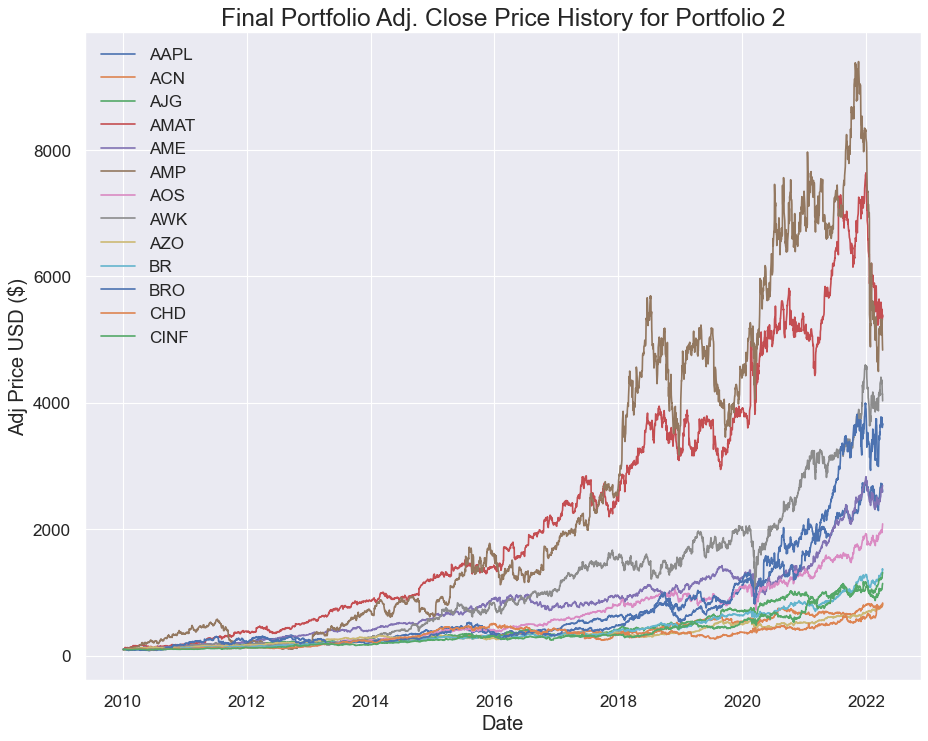

In [40]:
# Visually show the stock Portfolio
title = 'Final Portfolio Adj. Close Price History for Portfolio 2'

# Get the tickers for our Portfolio
stocks_to_invest = list()
for i in allocation.keys():
    stocks_to_invest.append(i)
stocks_to_invest

# Create and plot the graph
plt.figure(figsize=(12, 10), dpi=80)
for ticker in stocks_to_invest:
    df1 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    plt.plot(df1['Normalized Adj Close'], label = ticker)

plt.title(title, fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Price USD ($)', fontsize = 18)
plt.legend(my_stocks, loc = 'upper left')
plt.savefig('figures/portfolio_2_final.png')
plt.savefig('figures/portfolio_2_final.pdf')
plt.show()

In [41]:
# show the daily simple returns
final_portfolio = pd.DataFrame()
final_portfolio_returns = pd.DataFrame()
for ticker in stocks_to_invest:
    df3 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    final_portfolio[ticker] = df3['Adj Close']
    final_portfolio_returns[ticker] = df3['Adj Close'].pct_change().dropna()
final_portfolio_returns

,AAPL,CHD,DG,DPZ,EXR,...,HSY,COST,FTNT,KR,LLY
Date,,,,,,,,,,,
2010-01-06,-0.015906,0.004793,0.013758,0.028539,0.003387,...,-0.008610,0.013000,0.055465,0.000494,0.007388
2010-01-07,-0.001849,-0.011184,0.006785,0.039956,-0.007595,...,-0.009769,-0.004833,0.002061,0.009877,-0.005078
2010-01-08,0.006648,-0.002162,0.005476,0.000000,-0.022109,...,-0.003014,-0.007201,0.033933,-0.009291,-0.007655
2010-01-11,-0.008822,-0.004334,0.005446,0.007471,0.007826,...,-0.005498,0.001181,-0.002984,0.003948,0.013714
2010-01-12,-0.011375,0.025448,-0.002083,0.050847,-0.035375,...,0.043394,-0.005391,-0.012967,0.018191,-0.003382
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,0.023693,-0.005426,0.002303,0.016642,-0.016128,...,-0.010285,-0.000764,0.022654,-0.000696,-0.004271
2022-04-05,-0.018942,0.000893,0.013656,-0.031254,-0.003492,...,0.008729,0.000330,-0.013845,0.003656,0.003672
2022-04-06,-0.018451,0.011695,0.042030,-0.000179,0.033582,...,0.015292,0.016460,-0.028723,0.018734,0.045643


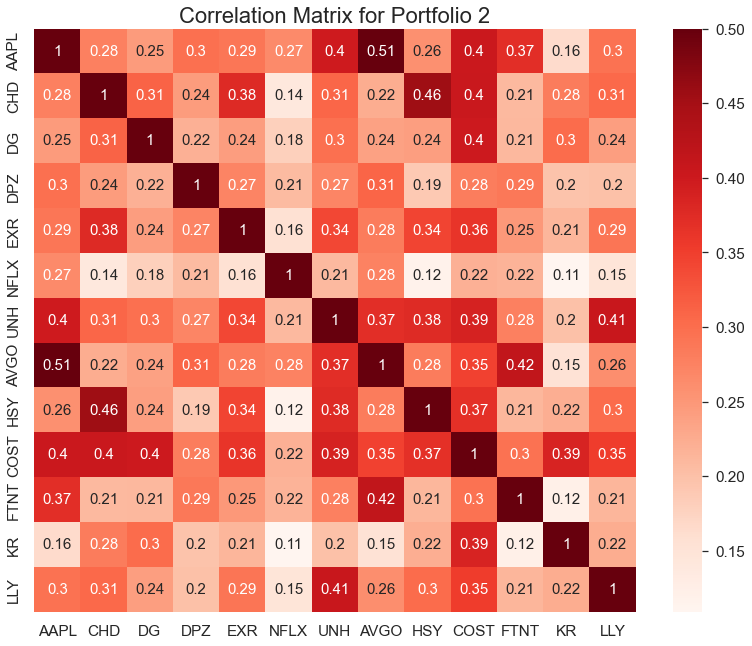

In [42]:
# Making a heat map representing the correlation matrix
title1 = "Correlation Matrix for Portfolio 2"

plt.figure(figsize = (12, 10))
sns.set(font_scale = 1.4)
sns.heatmap(final_portfolio_returns.corr(), cmap = "Reds", annot = True, annot_kws = {"size": 15}, vmax = 0.5)
plt.title(title1, fontsize = 22)
plt.savefig('figures/final_portfolio_2_hm.png')
plt.savefig('figures/final_portfolio_2_hm.pdf')
plt.show()

# Rough Work

In [ ]:
si.get_quote_table(ticker)

In [ ]:
si.get_stats_valuation(ticker)